In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

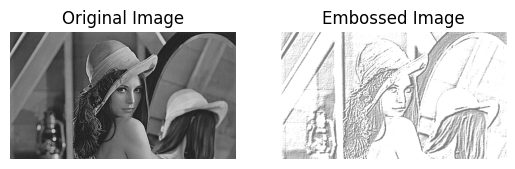

In [2]:
# 1

def emboss(image):
    kernel = np.array([[ -2, -1, 0],
                       [ -1,  1, 1],
                       [  0,  1, 2]])
    embossed_image = cv2.filter2D(image, -1, kernel)
    embossed_image = cv2.addWeighted(embossed_image, 1.5, np.zeros_like(embossed_image), 0, 128)
    return embossed_image

imBGR = cv2.imread('images/lena.jpg')
imGray = cv2.cvtColor(imBGR, cv2.COLOR_BGR2GRAY)
imEmbossed = emboss(imGray)

#This is high pass filter

plt.subplot(1, 2, 1)
plt.imshow(imGray, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imEmbossed, cmap='gray', vmin=0, vmax=255)
plt.title('Embossed Image')
plt.axis('off')
plt.show()

# Task 2

#### A:
Image smoothing is the process of removing noise from images. This ofthen helps with in the preprocessing phase when runing tasks such as edge detection

#### B:
The main difference between these filters is in the way that they are calculated with the main difference being in how much weight they give their neighbouring piexels. 
In an averaging filter all surronding pixels are given the same amount of weight whereas in a gausiian filter the further away a pixel is from the Piel OF Interest(POI) the less importance it is given

# Task 3

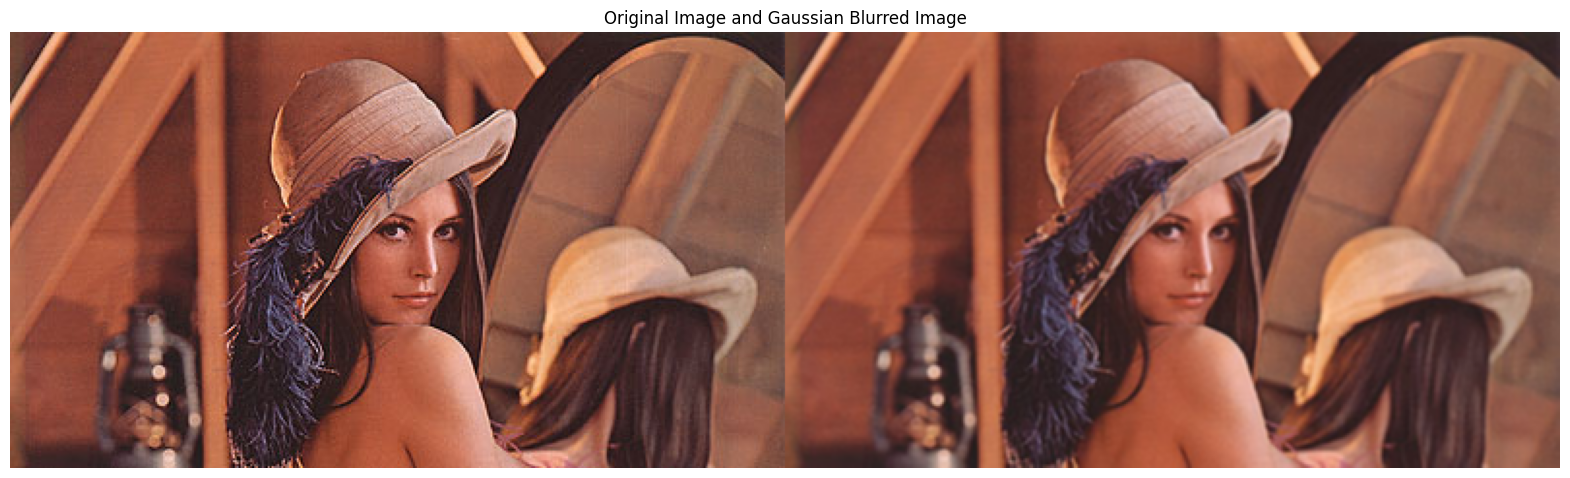

In [4]:
def Gausian_blur(image):
    kernel = np.array([[1,2,1],
                   [2,4,2],         # Divisor should be sum of kernel
                   [1,2,1]]) / 16 #important to add the division as filter 2d wont do it automatically
    output = cv2.filter2D(image, -1, kernel)
    return output

imBGR = cv2.imread('images/lena.jpg')
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
imGaussianBlur = Gausian_blur(imRGB)

lena_concatinated = np.hstack((imRGB, imGaussianBlur))

plt.figure(figsize = (20,20))
plt.imshow(lena_concatinated)
plt.title('Original Image and Gaussian Blurred Image')
plt.axis('off')
plt.show()